<a href="https://colab.research.google.com/github/Jane-Ngala/Core-Module-2-Week-4-IP-/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIVE BAYES

## 1.Defining the Question

### a) Specifying the Data Analytic Question

- To build a model that determines whether an e-mail is spam or not

### b) Defining the Metric of success

- The model will be considered successful if it is able to predict if an e-mail is spam or not

### c) Understanding the Context

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

### d) Understanding the experimental design

- Loading the libraries and datasets
- Data cleaning and preparation
- Performing EDA
- Splitting the train dataset into train and test sets (80-20)
- Compute the accuracy (percentage of correct classification)
- Report the confusion matrix of each classifier.
- Repeat modelling using70-30 and 60-40
- Making conclusions and recommendations


### e) Appropriateness of the data

- The data is from a reliable source

## 2.Reading and checking the data

In [1]:
# Loading libraries

import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB


In [2]:
# Loading the dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
spam = pd.read_csv(url)
spam

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
# Loading description of data

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
spam_names = pd.read_csv(url, sep='delimiter')
spam_names

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
0,|
1,"| 48 continuous real [0,100] attributes of typ..."
2,| = percentage of words in the e-mail that mat...
3,| i.e. 100 * (number of times the WORD appears...
4,"| total number of words in e-mail. A ""word"" i..."
...,...
81,char_freq_$: continuous.
82,char_freq_#: continuous.
83,capital_run_length_average: continuous.
84,capital_run_length_longest: continuous.


In [4]:
# Renaming the columns

spam.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all',
'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
'char_freq_[', 'char_freq_!', 'char_freq_$','char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
'capital_run_length_total', 'spam']

spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [5]:
# Previewing bottom of data

spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [6]:
# Previewing number of records

spam.shape

(4600, 58)

In [7]:
# Previewing the datatypes

spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

- All datatypes are appropriate

## 3.Tidying the data

In [8]:
# Checking for duplicates

spam.duplicated().sum()

391

In [9]:
# Taking a closer look at the duplicates

spam_duplicates = spam[spam.duplicated()]
spam_duplicates

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
25,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
102,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
103,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
104,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
105,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4440,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4536,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4540,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


In [10]:
# Dropping the duplicates

spam.drop_duplicates(keep = 'first', inplace = True)

In [12]:
spam.shape

(4209, 58)

In [13]:
# Checking for missing values

spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

- There are no missing value, data is complete

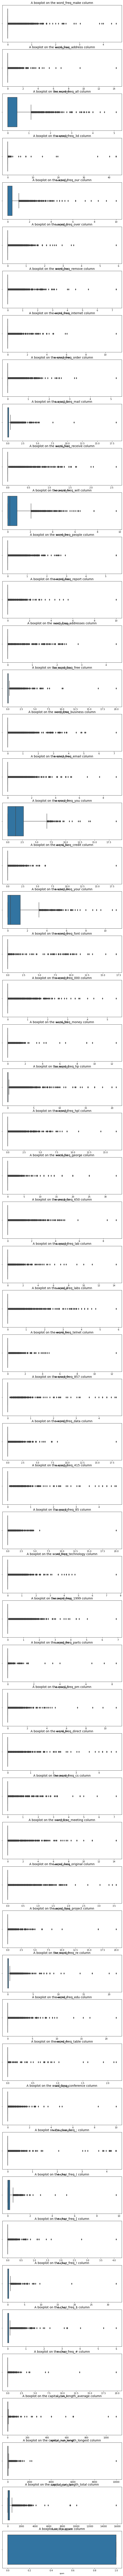

In [14]:
# Checking for outliers

col_names = spam.columns
fig, ax = plt.subplots(len(col_names), figsize = (10,220))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = spam[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [15]:
# Define the outliers range 

Q3 = spam[col_names].quantile(0.75)
Q1 = spam[col_names].quantile(0.25)
IQR = Q3 - Q1

outliers = spam[col_names][((spam[col_names] < (Q1 - 1.5 * IQR))
 |(spam[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
j = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(spam))*100

# The total number of outliers
print(f"The total number of outliers are {j}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (4095, 58). Which translates to 97.29151817533857% of the data.


- The outliers are too many to drop, if dropped there will not be enough data for analysis.

## 4.EDA

In [16]:
# Previewing the statistical summary

spam.describe(include = 'all')

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


In [17]:
# Computing the mode

spam.mode()
mode_df = pd.DataFrame(spam.mode())
mode_df.head(1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,7,0.0


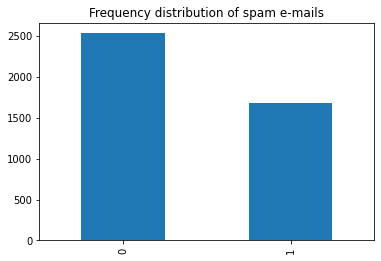

In [18]:
# Plotting bar chart for spam column

spam['spam'].value_counts().plot.bar(title='Frequency distribution of spam e-mails')

- Majority of the e-mails in our dataset were considered not spam  

In [19]:
# Creating a correlation matrix
 
correlations = spam.corr()
correlations

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
word_freq_remove,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
word_freq_internet,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
word_freq_order,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
word_freq_mail,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


## 5.Naive Bayes

In [20]:
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [21]:
# Splitting to train and test sets

X= spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = spam['spam']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [22]:
# Standardizing the data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
# Training the model

clf = GaussianNB()
clf = clf.fit(X_train, y_train)

# Making prediction

y_pred = clf.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
comparison_frame

,actual,predicted
3801,0,0
2278,0,0
2869,0,1
210,1,1
3281,0,0
...,...,...
320,1,1
545,1,1
4161,0,1
2424,0,0


In [24]:
# Evaluating performance

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       495
           1       0.70      0.97      0.81       347

    accuracy                           0.81       842
   macro avg       0.83      0.84      0.81       842
weighted avg       0.86      0.81      0.82       842

[[351 144]
 [ 12 335]]
model accuracy 0.8147268408551069


- The accuracy of the 80-20 split is 81%

In [25]:
# Splitting the data 70-30

X= spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = spam['spam']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Standardizing the data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
# Training the model

clf = GaussianNB()
clf = clf.fit(X_train, y_train)

# Making prediction

y_pred = clf.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
comparison_frame

,actual,predicted
3801,0,0
2278,0,0
2869,0,1
210,1,1
3281,0,0
...,...,...
753,1,1
2,1,1
296,1,1
4306,0,1


In [27]:
# Evaluating performance

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.83       737
           1       0.71      0.96      0.82       526

    accuracy                           0.82      1263
   macro avg       0.84      0.84      0.82      1263
weighted avg       0.86      0.82      0.82      1263

[[534 203]
 [ 20 506]]
model accuracy 0.8234362628661916


- Accuracy score of the 70-30 split is 82%

In [28]:
# Splitting the data 60-40

X= spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = spam['spam']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

# Standardizing the data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
# Training the model

clf = GaussianNB()
clf = clf.fit(X_train, y_train)

# Making prediction

y_pred = clf.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
comparison_frame

,actual,predicted
3801,0,0
2278,0,0
2869,0,1
210,1,1
3281,0,0
...,...,...
2338,0,1
1506,1,1
4139,0,1
4243,0,1


In [30]:
# Evaluating performance

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       994
           1       0.71      0.96      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684

[[729 265]
 [ 27 663]]
model accuracy 0.8266033254156769


- Accuracy score for the 60-40 split is 83%

## 6.Conclusion

- The 60-40 split has the highest accuracy score of 83%